<a href="https://colab.research.google.com/github/guiabbehusen/ML-PyTorch/blob/main/01_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
from sklearn.datasets import make_circles

In [35]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

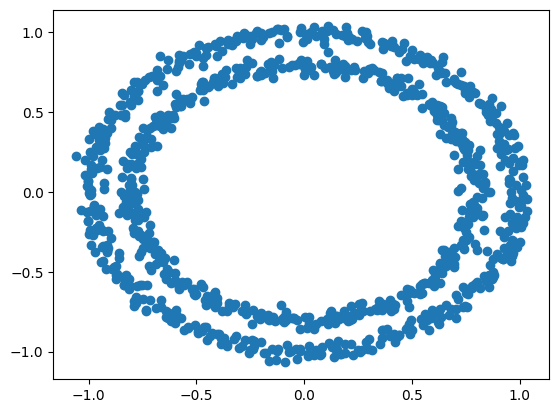

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])

In [37]:
X = torch.from_numpy(X).type(torch.float)

In [38]:
y = torch.from_numpy(y).type(torch.float)
type(y)

torch.Tensor

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [40]:
len(X_train), len(X_test)

(800, 200)

In [41]:
from transformers import pipeline

In [42]:
text = """I was thrilled to receive this package. I ordered an Optimus Prime action figure — the iconic Autobot leader, a true classic and my favorite character.

After days of waiting, the box finally arrived. I opened it eagerly, expecting to see Prime’s heroic figure, perfectly detailed and ready for display.

But what did I get?

Megatron. Not even a high-quality one — just a cheap knockoff with sloppy paint, wobbly joints, and a face that’s honestly unsettling.

This isn’t just a mistake; it’s a huge disappointment. Imagine expecting the noble Optimus Prime and finding Megatron’s creepy grin staring back at you.

Really frustrated. I didn’t order a Decepticon, and I definitely don’t want this one.

I’m requesting an exchange for the correct Optimus Prime figure ASAP. Transformers fans deserve better."""

In [43]:
import pandas as pd
classifier = pipeline("text-classification")
outputs=classifier(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,label,score
0,NEGATIVE,0.99751


In [44]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs=ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


,entity_group,score,word,start,end
0,MISC,0.955577,Optimus Prime,53,66
1,MISC,0.970401,Autobot,94,101
2,PER,0.972611,Prime,239,244
3,PER,0.568141,Megatron,326,334
4,MISC,0.756811,Optimus Prime,545,558
5,PER,0.871302,Megatron,571,579
6,MISC,0.927590,Decepticon,652,662
7,MISC,0.964183,Optimus Prime,746,759
8,MISC,0.780297,Transformers,773,785


In [45]:
reader = pipeline("question-answering")
question = "What does the customer wants?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,score,start,end,answer
0,0.285549,718,771,an exchange for the correct Optimus Prime figu...


In [46]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length = 45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1642: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 The Transformers fans deserve better. Transformers fans need better. I’m requesting an exchange for the correct Optimus Prime figure. I didn’t order a Decepticon, and I definitely don’


In [47]:
print(outputs[0]['summary_text'])

 The Transformers fans deserve better. Transformers fans need better. I’m requesting an exchange for the correct Optimus Prime figure. I didn’t order a Decepticon, and I definitely don’


In [48]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0])

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


{'translation_text': 'Ich war begeistert, dieses Paket zu erhalten. Ich bestellte eine Optimus Prime Action Figur — der ikonische Autobot-Führer, ein wahrer Klassiker und mein Lieblingscharakter. Nach Tagen des Wartens, kam die Box schließlich. Ich öffnete sie eifrig, erwartet Prime heldenhafte Figur zu sehen, perfekt detailliert und bereit für die Anzeige. Aber was habe ich bekommen? Megatron. Nicht einmal ein qualitativ hochwertiges - nur eine billige Knockoff mit schlampigen Farbe, wobbly Gelenke, und ein Gesicht, das ehrlich beunruhigend. Dies ist nicht nur ein Fehler; es ist eine riesige Enttäuschung. Stellen Sie sich vor, die edle Optimus Prime und Megatron finden gruselig Grins zurück auf Sie. Wirklich frustriert. Ich habe keine Decepticon bestellt, und ich will definitiv nicht dieses. Ich bitte um einen Austausch für die richtige Optimus Prime Figur ASAP. Transformers Fans verdienen besser.'}


In [49]:
!pip install -U "datasets>=2.18.0" "fsspec>=2024.3.0" "huggingface_hub>=0.23.0"

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [50]:
from datasets import load_dataset

emotions = load_dataset("dair-ai/emotion")

In [51]:
emotions["train"]["label"]

Column([0, 0, 3, 2, 3])

In [52]:
emotions["train"][:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [53]:
import pandas as pd
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [54]:
def l2i(row):
  return emotions["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(l2i)

df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [55]:
import matplotlib.pyplot as plt

<Axes: ylabel='label_name'>

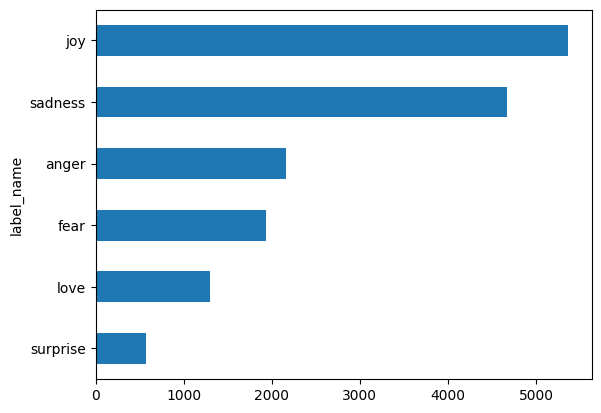

In [56]:
df["label_name"].value_counts(ascending=True).plot.barh()

In [57]:
emotions.reset_format()

In [58]:
import torch
import torch.nn.functional as F

In [59]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
token2idx = {ch : idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [60]:
ip = [token2idx[token] for token in tokenized_text]
print(ip)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [61]:
categorical = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0, 1, 2]}
)

In [62]:
categorical

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [63]:
pd.get_dummies(categorical["Name"])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [64]:
ip = torch.tensor(ip)

In [65]:
one_hot = F.one_hot(ip, num_classes=len(token2idx))

In [66]:
one_hot.shape

torch.Size([38, 20])

In [67]:
from transformers import AutoTokenizer

In [69]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [71]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [79]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)